In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
matches=pd.read_csv("matches.csv")
matches.shape

(756, 18)

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.nunique(axis=0)

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [6]:
matches.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [8]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.shape

(179078, 21)

In [9]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [12]:
deliveries.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [13]:
deliveries.nunique(axis=0)

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [14]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

DATA PRE-PROCESSING

In [15]:
#We can observe that 'inning' in 'deliveries' has a maximum value of 5, but in T-20 cricket there are two inings per match
#Removing outliers in 'inning' column

In [16]:
deliveries=deliveries[deliveries.inning != 5]
deliveries.shape

(179070, 21)

In [17]:
deliveries=deliveries[deliveries.inning != 4]
deliveries.shape

(179032, 21)

In [18]:
deliveries=deliveries[deliveries.inning != 3]
deliveries.shape

(178982, 21)

In [19]:
matches.umpire1.value_counts(dropna=False)

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
Ulhas Gandhe        1
A Nanda Kishore     1
SL Shastri          1
Nanda Kishore       1
SJA Taufel          1
Name: umpire1, Length: 62, dtype: int64

In [20]:
matches.umpire2.value_counts(dropna=False)

S Ravi                   57
C Shamshuddin            57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
                         ..
Ian Gould                 1
Kumar Dharmasena          1
KN Ananthapadmanabhan     1
Nand Kishore              1
JD Cloete                 1
Name: umpire2, Length: 66, dtype: int64

In [21]:
matches.umpire3.value_counts(dropna=False)

NaN                        637
O Nandan                    10
C Shamshuddin               10
Nitin Menon                 10
Anil Chaudhary               9
Vineet Kulkarni              8
S Ravi                       8
Anil Dandekar                7
Bruce Oxenford               7
Yeshwant Barde               7
Chris Gaffaney               6
Rod Tucker                   5
Marais Erasmus               5
Nigel Llong                  4
Nanda Kishore                3
A Nanda Kishore              3
Ian Gould                    3
K Ananthapadmanabhan         2
Ulhas Gandhe                 2
Kumar Dharmasena             2
A.D Deshmukh                 2
Virender Kumar Sharma        2
KN Ananthapadmanabhan        1
Chettithody Shamshuddin      1
Sundaram Ravi                1
KN Anantapadmanabhan         1
Name: umpire3, dtype: int64

In [22]:
#As we observe there are a lot of NaN values in the three columns of 'umpire1','umpire2','umpire3'
#Dropping the names of umpires who officiated matches , which are reduntant

In [23]:
matches=matches.drop(['umpire1','umpire2','umpire3'], axis=1)

In [24]:
matches.shape

(756, 15)

In [25]:
matches.winner.value_counts(dropna=False)

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
NaN                              4
Name: winner, dtype: int64

In [26]:
#Removing records having null values in "winner" column
matches=matches[matches["winner"].notna()]

In [27]:
#Finding any duplicate values
for team in matches['team1'].unique():
    print(team)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants
Delhi Capitals


In [28]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [29]:
#Replacing the Deccan Charges with Sunrisers Hyderabad
matches["team2"]=matches["team2"].replace("Deccan Chargers","Sunrisers Hyderabad")
matches["team1"]=matches["team1"].replace("Deccan Chargers","Sunrisers Hyderabad")
matches["winner"]=matches["winner"].replace("Deccan Chargers","Sunrisers Hyderabad")
matches["toss_winner"]=matches["toss_winner"].replace("Deccan Chargers","Sunrisers Hyderabad")

In [30]:
#Replacing the Delhi Daredevils with Delhi Capitals
matches["team2"]=matches["team2"].replace("Delhi Daredevils","Delhi Capitals")
matches["team1"]=matches["team1"].replace("Delhi Daredevils","Delhi Capitals")
matches["winner"]=matches["winner"].replace("Delhi Daredevils","Delhi Capitals")
matches["toss_winner"]=matches["toss_winner"].replace("Delhi Daredevils","Delhi Capitals")

In [31]:
#Finding cities which are null
matches[pd.isnull(matches['city'])]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [32]:
matches[pd.isnull(matches['venue'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue


In [33]:
#Finding unique values
for venue in matches['venue'].unique():
    print(venue)

Rajiv Gandhi International Stadium, Uppal
Maharashtra Cricket Association Stadium
Saurashtra Cricket Association Stadium
Holkar Cricket Stadium
M Chinnaswamy Stadium
Wankhede Stadium
Eden Gardens
Feroz Shah Kotla
Punjab Cricket Association IS Bindra Stadium, Mohali
Green Park
Punjab Cricket Association Stadium, Mohali
Sawai Mansingh Stadium
MA Chidambaram Stadium, Chepauk
Dr DY Patil Sports Academy
Newlands
St George's Park
Kingsmead
SuperSport Park
Buffalo Park
New Wanderers Stadium
De Beers Diamond Oval
OUTsurance Oval
Brabourne Stadium
Sardar Patel Stadium, Motera
Barabati Stadium
Vidarbha Cricket Association Stadium, Jamtha
Himachal Pradesh Cricket Association Stadium
Nehru Stadium
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Subrata Roy Sahara Stadium
Shaheed Veer Narayan Singh International Stadium
JSCA International Stadium Complex
Sheikh Zayed Stadium
Sharjah Cricket Stadium
Dubai International Cricket Stadium
M. A. Chidambaram Stadium
Feroz Shah Kotla Ground
M. Chinnasw

In [34]:
#Since venue column doesnt have any null values
#We will fill the values of city based on venue

conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

In [35]:
#Finding cities which are null, cross verification
matches[pd.isnull(matches['city'])]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue


In [36]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


DATA VISUALISATION

(13.0, 0.0)

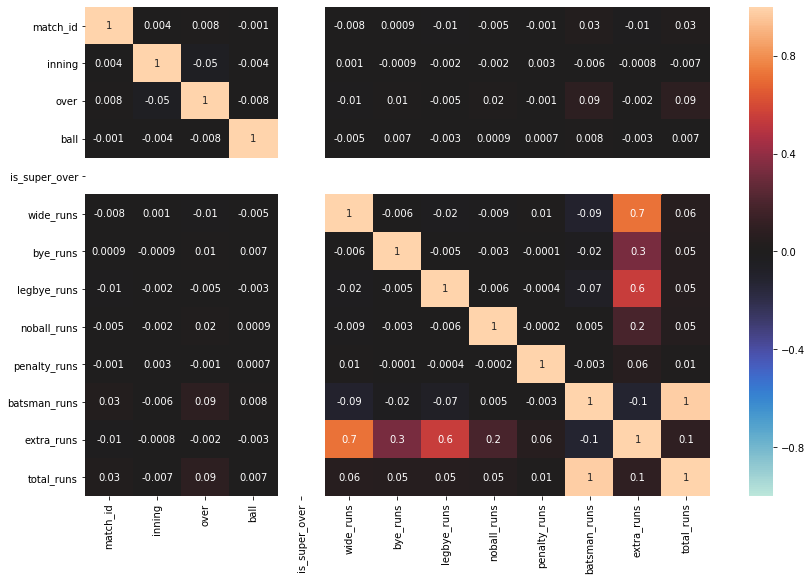

In [38]:
#HEATMAP for 'deliveries.csv'
plt.figure(figsize = (14,9))
ax=sns.heatmap(deliveries.corr(),annot = True, fmt='.1g' ,vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(5.0, 0.0)

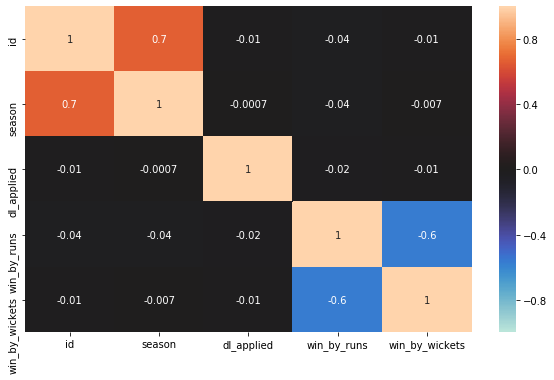

In [39]:
plt.figure(figsize = (10,6))
ax=sns.heatmap(matches.corr(),annot = True, fmt='.1g' ,vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

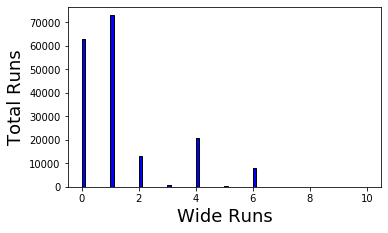

In [40]:
plt.figure(figsize = (10,6))
ax = plt.subplot(2, 2, 2)
    
    # Draw the plot
ax.hist(deliveries['total_runs'], bins = int(180/2),color = 'blue', edgecolor = 'black')
    
    # Title and labels
ax.set_xlabel('Wide Runs', size = 18)
ax.set_ylabel('Total Runs', size= 18)

plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015EA6AE9608>,
      dtype=object)

<Figure size 1008x792 with 0 Axes>

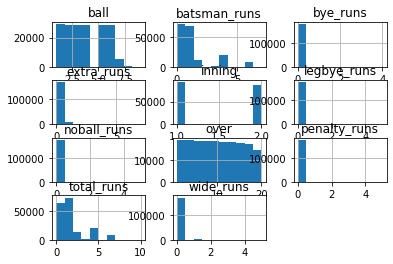

In [41]:
#plotting match id with every other attribute in the dataset 'deliveries.csv'
plt.figure(figsize = (14,11))
deliveries.drop(['match_id','is_super_over'],axis=1).hist()

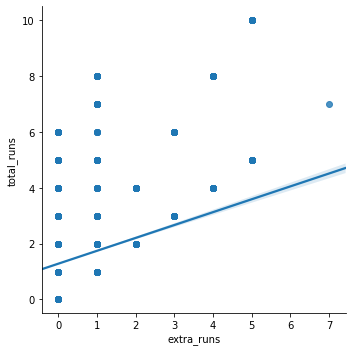

In [42]:
sns.lmplot(x='extra_runs',y='total_runs',data=deliveries)

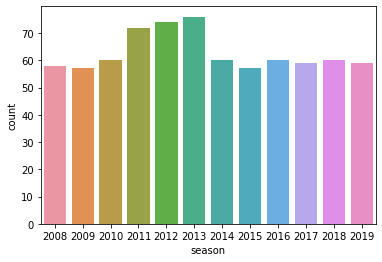

In [43]:
#Which season had the maximum number of matches
sns.countplot(x='season', data=matches)
plt.show()

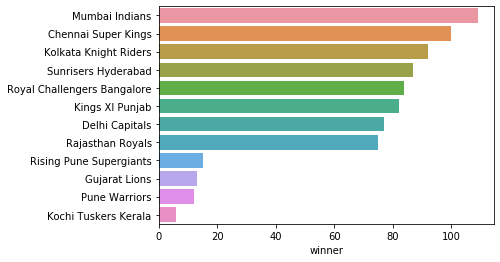

In [44]:
#The most successful IPL team, based on which team has won most number of times
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

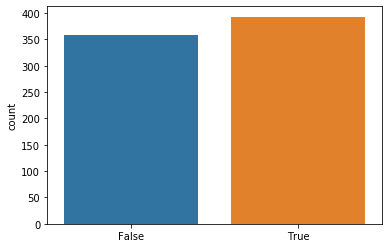

In [45]:
# Does toss-winning help in winning the match?
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()
sns.countplot(ss);

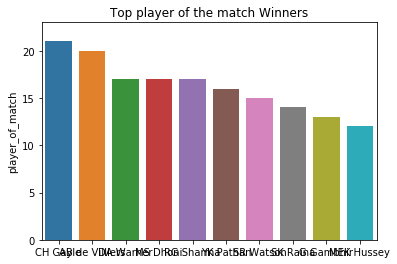

In [46]:
#Most successful players based on no.MOM awards
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,23])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

In [47]:
y2008=matches[matches['season']==2008] 
y2009=matches[matches['season']==2009]
y2010=matches[matches['season']==2010]
y2011=matches[matches['season']==2011]
y2012=matches[matches['season']==2012]
y2013=matches[matches['season']==2013]
y2014=matches[matches['season']==2014]
y2015=matches[matches['season']==2015]
y2016=matches[matches['season']==2016]
y2017=matches[matches['season']==2017]
y2018=matches[matches['season']==2018]
y2019=matches[matches['season']==2019]

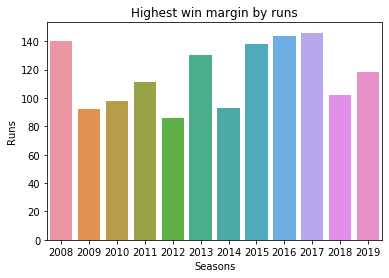

In [48]:
#Highest win margins by runs
hwbr=[]
xyears=[y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019]
i=0
teams=[]

for x in xyears:
    highest_win_by_runs=x["win_by_runs"]
    hwbr.append(highest_win_by_runs.max())
    #print(hwbr[i])
    #p=
    i=i+1

#print(hwbr)

xyearss=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

#labels = ["label%d" % i for i in xrange(len(rects))]

sns.barplot(x = xyearss, y = hwbr, orient='v');
plt.title('Highest win margin by runs')
plt.xlabel('Seasons')
plt.ylabel('Runs')
plt.show()

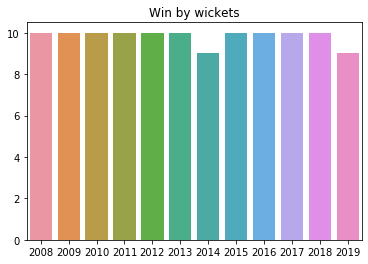

In [109]:
hwbw=[]

i=0
for x in xyears:
    highest_win_by_wickets=x["win_by_wickets"]
    hwbw.append(highest_win_by_wickets.max())
    #print(hwbw[i])
    i=i+1

#print(hwbw)
    
sns.barplot(x = xyearss, y = hwbw, orient='v');
plt.title('Win by wickets')
plt.show()

In [49]:
#Analysis Between Played matches and Won matches
won_match = matches.groupby('winner')[['id']].count()
#print("hi")
won_match = won_match.reset_index()
won_match.columns=['team_name','matches_won']
won_match.sort_values(by= 'matches_won', ascending = False, inplace = True)

In [50]:
matches_team1 = matches.groupby('team1')[['id']].count()
matches_team1 = matches_team1.reset_index()
matches_team1.rename(columns = {'team1':'team_name', 'id':'matches_played'}, inplace= True)
matches_team2 = matches.groupby('team2')[['id']].count()
matches_team2 = matches_team2.reset_index()
matches_team2.rename(columns = {'team2':'team_name', 'id':'matches_played'}, inplace= True)
matches_play = pd.concat([matches_team1,matches_team2], axis = 0)
matches_played_total = matches_play.groupby(['team_name'])[['matches_played']].sum()
matches_played_total = matches_played_total.sort_values(by= 'matches_played', ascending= False).reset_index()
data_for_matches = matches_played_total.merge(won_match, on = 'team_name')
data_for_matches

,team_name,matches_played,matches_won
0,Mumbai Indians,187,109
1,Sunrisers Hyderabad,183,87
2,Kolkata Knight Riders,178,92
3,Royal Challengers Bangalore,177,84
4,Kings XI Punjab,176,82
5,Delhi Capitals,175,77
6,Chennai Super Kings,164,100
7,Rajasthan Royals,145,75
8,Pune Warriors,45,12
9,Gujarat Lions,30,13


<BarContainer object of 12 artists>

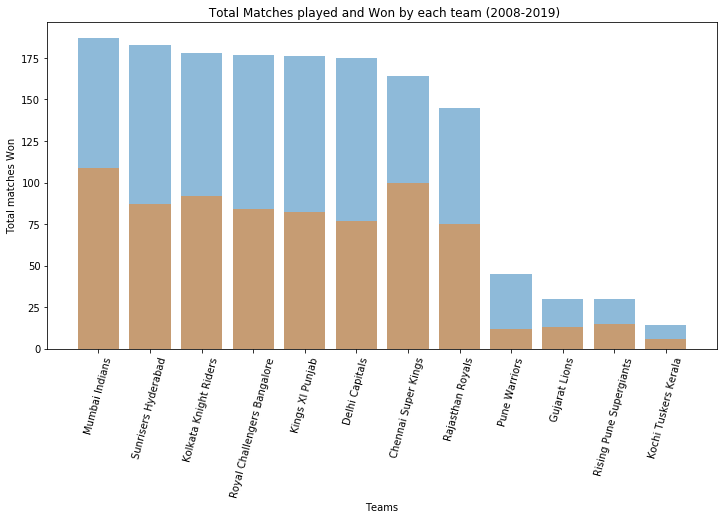

In [51]:
plt.figure(figsize = (12, 6))
plt.title(' Total Matches played and Won by each team (2008-2019)')
plt.xlabel('Teams')
plt.ylabel('Total matches Won')
plt.xticks(rotation=75,fontsize=10)
plt.bar(data_for_matches.team_name, data_for_matches.matches_played, alpha=0.5)
plt.bar(data_for_matches.team_name, data_for_matches.matches_won, alpha=0.5)

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


Text(0.5, 1.0, 'Top 10 Bowlers in IPL- Seasons 2008-2019')

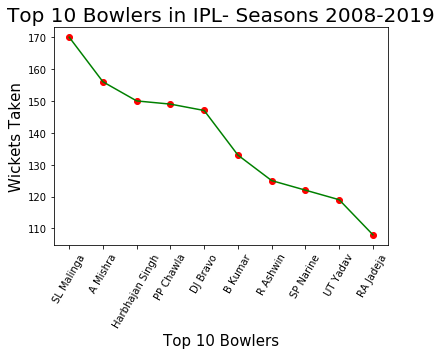

In [52]:
bowling_wickets= deliveries[deliveries['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r')
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g')
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers',size=15)
plt.ylabel('Wickets Taken',size=15)
plt.title('Top 10 Bowlers in IPL- Seasons 2008-2019',size=20)

                batsman_runs
batsman                     
V Kohli                 5429
SK Raina                5407
RG Sharma               4914
DA Warner               4741
S Dhawan                4632
CH Gayle                4535
MS Dhoni                4477
RV Uthappa              4444
AB de Villiers          4415
G Gambhir               4223


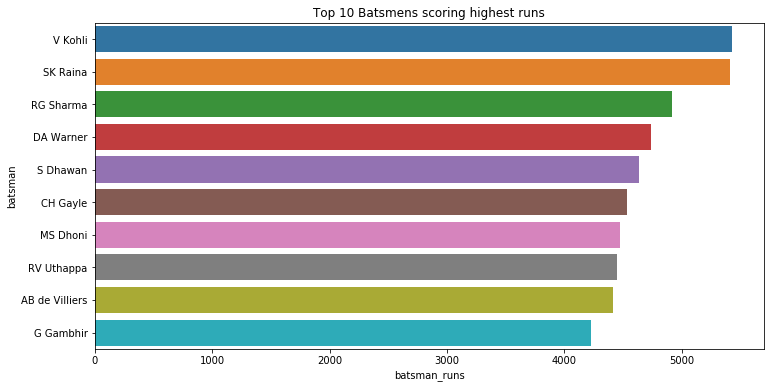

In [54]:
highest_runs = deliveries.groupby('batsman')[['batsman_runs']].sum()
highest_runs = highest_runs.sort_values('batsman_runs', ascending = False).head(10)
print(highest_runs)
plt.figure(figsize = (12,6))
plt.title('Top 10 Batsmens scoring highest runs')
ay = sns.barplot(x='batsman_runs', y=highest_runs.index, data = highest_runs)

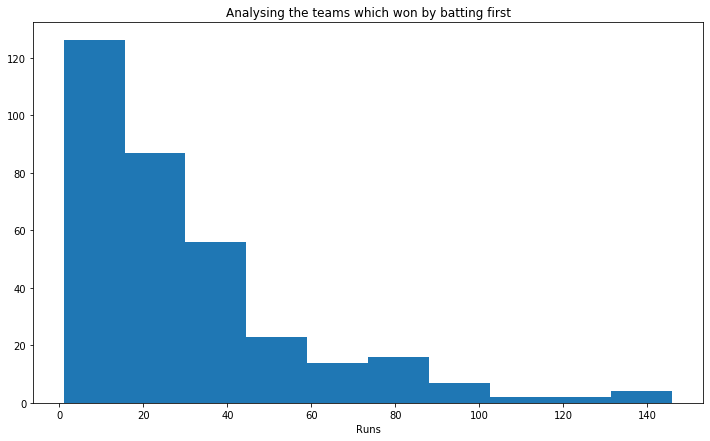

In [55]:
batting_first = matches[matches['win_by_runs']!=0]
batting_first.head()
plt.figure(figsize = (12,7))
plt.title('Analysing the teams which won by batting first')
plt.xlabel('Runs')
plt.hist(batting_first.win_by_runs, bins = 10);

In [56]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Sunrisers Hyderabad            48
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Delhi Capitals                 28
Rajasthan Royals               27
Rising Pune Supergiants         7
Pune Warriors                   6
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

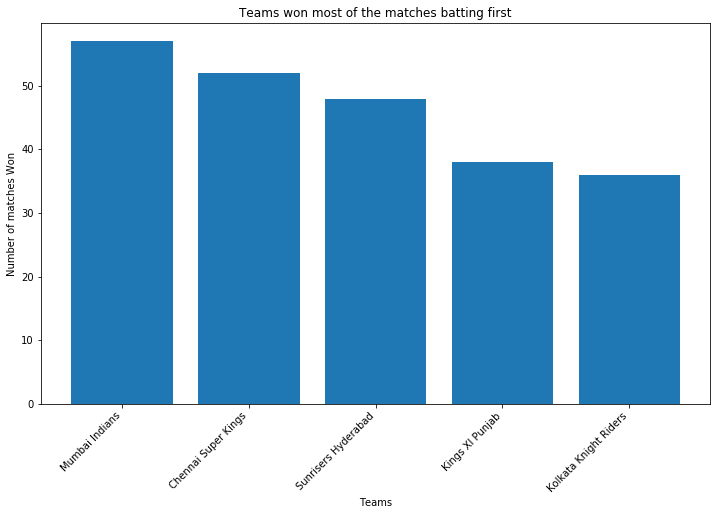

In [57]:
plt.figure(figsize = (12,7))
plt.title('Teams won most of the matches batting first')
plt.xlabel('Teams')
plt.ylabel('Number of matches Won')
plt.xticks(rotation = 45, ha = 'right')
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),
        list(batting_first['winner'].value_counts()[0:5]));

In [58]:
### Finding the  best strike rate in death overs.Death overs = over>15

death_df = deliveries[ deliveries.over > 16 ]  #Taking data for overs > 16
def balls_faced(x):
    return len(x)

temp_df = death_df.groupby('batsman')['batsman_runs'].agg([balls_faced,'sum']).reset_index() #making new column 'ball faced' and 'total run'
temp_df = temp_df.ix[temp_df.balls_faced>50,:]   #we will consider only the player who have faced more than 50 balls
temp_df['strike-rate in death overs'] = (temp_df['sum'] / temp_df['balls_faced'])*100   #adding our required column 'strike-rate'
temp_df = temp_df.sort_values(by='strike-rate in death overs', ascending=False).reset_index(drop=True)   #now we sort them by their strike rates
temp_df = temp_df.iloc[:10,:]     #lets select the top 10 players
temp_df = temp_df[['batsman','strike-rate in death overs']]
temp_df

C:\Users\trupt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\trupt\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,batsman,strike-rate in death overs
0,RR Pant,233.333333
1,AB de Villiers,226.483051
2,AD Russell,207.621951
3,CH Gayle,204.320988
4,SV Samson,203.246753
5,BB McCullum,202.564103
6,V Kohli,198.620690
7,KP Pietersen,196.428571
8,RG Sharma,193.378608
9,KK Nair,192.233010


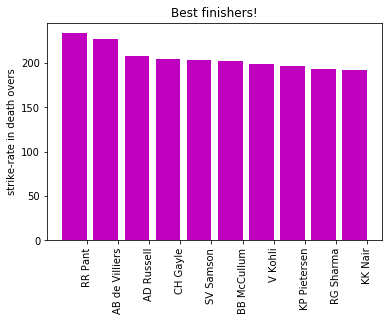

In [59]:
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['strike-rate in death overs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("strike-rate in death overs")
ax.set_title("Best finishers!")
#autolabel(rects)
plt.show()

In [60]:
# Highest contribution to team (Total team runs / Player runs)
# Player should play atleast 15 matches

teamRuns = deliveries.groupby(['match_id','inning'], as_index=False).agg({"total_runs": sum})
playerRuns = deliveries.groupby(['match_id','inning','batsman'],as_index=False).agg({"batsman_runs": sum})
playerContribution = pd.merge(teamRuns,playerRuns,on=['match_id','inning'])
playerContribution["contribution(%)"] = playerContribution.apply(lambda x: x["batsman_runs"]*100/x["total_runs"],axis=1)
playerContribution = playerContribution.groupby(['batsman'],as_index=False).agg({"contribution(%)": np.mean, "batsman_runs": sum, "match_id": lambda x: x.nunique()})
playerContribution = playerContribution.rename(index=str, columns={"match_id": "matches_played"})
playerContribution = playerContribution.sort_values('contribution(%)',ascending=False)

playerContribution = playerContribution[playerContribution['matches_played'] > 15]
playerContribution.head(n=20)

,batsman,contribution(%),batsman_runs,matches_played
112,DA Warner,23.350887,4741,126
92,CH Gayle,22.741906,4535,124
426,SE Marsh,21.894851,2477,69
244,LMP Simmons,21.506403,1079,29
164,HM Amla,21.368072,577,16
223,KL Rahul,21.027480,2013,58
282,ML Hayden,20.829003,1107,32
273,MEK Hussey,20.725565,1977,58
486,V Kohli,20.428764,5429,169
374,RR Pant,19.495200,1786,54


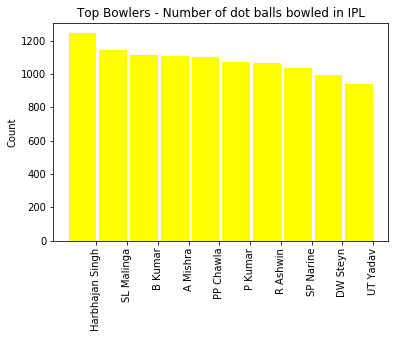

In [61]:
temp_df = deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='yellow')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
#autolabel(rects)
plt.show()

In [62]:
matches=matches.rename(columns={'id':'match_id'})

In [63]:
data_set = pd.merge(deliveries, matches,on='match_id')
data_set.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


In [64]:
#creating a custom list that contains match_id,batsman's name, runs scored, is_super_over
Player_Runs  = list([data_set['match_id'],data_set['batsman'],data_set['batsman_runs'],data_set['is_super_over']
                     ,data_set['wide_runs']
                     ,data_set['noball_runs'],data_set['season']])

In [65]:
#Finding the list of Players who have batted
#player contains the list of players
player = set()
for i in range(len(Player_Runs[0:][1])):
    player.add(Player_Runs[0:][1][i])
player_list = list(player)
player_list=[player_list]

In [66]:
#Creating custom list of a particular player
#List contains match_id, player_name, runs_scored at particular ball
name = input("Enter the name of the Batsman :")
print(name)
Player_Match = []
for i in range(len(Player_Runs[0:][1])):
    if(Player_Runs[0:][1][i]==name and Player_Runs[0:][3][i]==0):
        Player_Match.append([[Player_Runs[0:][0][i]],[Player_Runs[0:][1][i]],[Player_Runs[0:][2][i]],[Player_Runs[0:][6][i]]])


Enter the name of the Batsman :V Kohli
V Kohli


In [67]:
Player_Balls = []
for i in range(len(Player_Runs[0:][1])):
    if(Player_Runs[0:][1][i]==name and Player_Runs[0:][3][i]==0 and Player_Runs[0:][4][i]==0 ):
        Player_Balls.append([[Player_Runs[0:][0][i]],[Player_Runs[0:][1][i]],[Player_Runs[0:][2][i]]])

count = 0
for i in range(len(Player_Match)):
    #if(Player_Match[i][2][0]):
        count += 1
count
print("No of Balls faced by",name, "are : ",len(Player_Balls))

No of Balls faced by V Kohli are :  4099


In [68]:
#Finding Runs, Century and Half Century scored by the player in a match
Player_Match_Runs = []
Runs = []
match_no = Player_Match[0][0]
sum = 0
for i in range(len(Player_Match)):
    if(Player_Match[i][0] == match_no):
        sum += Player_Match[i][2][0]
    else:
        Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
        Runs.append(sum)
        sum = Player_Match[i][2][0]
        match_no =  Player_Match[i][0];
Player_Match_Runs.append([Player_Match[i-1][0],Player_Match[i-1][1],[sum],Player_Match[i-1][3]])
Runs.append(sum)

In [69]:
#Century and Half Century scored by the player
fifty = 0
century = 0
for i in range(len(Player_Match_Runs)):
    if(Player_Match_Runs[i][2][0]>=50 and Player_Match_Runs[i][2][0]<100):
        fifty = fifty+1
    elif(Player_Match_Runs[i][2][0]>=100):
        century = century+1
print("Century : ",century)
print("Half Century : ",fifty)

Century :  5
Half Century :  37


In [70]:
#Runs Scored in each match
Player_Match_Runs

[[[12], ['V Kohli'], [62], [2017]],
 [[17], ['V Kohli'], [28], [2017]],
 [[20], ['V Kohli'], [64], [2017]],
 [[27], ['V Kohli'], [0], [2017]],
 [[30], ['V Kohli'], [10], [2017]],
 [[33], ['V Kohli'], [55], [2017]],
 [[37], ['V Kohli'], [20], [2017]],
 [[42], ['V Kohli'], [6], [2017]],
 [[45], ['V Kohli'], [5], [2017]],
 [[55], ['V Kohli'], [58], [2017]],
 [[60], ['V Kohli'], [1], [2008]],
 [[63], ['V Kohli'], [23], [2008]],
 [[70], ['V Kohli'], [13], [2008]],
 [[74], ['V Kohli'], [12], [2008]],
 [[76], ['V Kohli'], [1], [2008]],
 [[80], ['V Kohli'], [9], [2008]],
 [[84], ['V Kohli'], [34], [2008]],
 [[90], ['V Kohli'], [0], [2008]],
 [[94], ['V Kohli'], [21], [2008]],
 [[101], ['V Kohli'], [3], [2008]],
 [[107], ['V Kohli'], [10], [2008]],
 [[111], ['V Kohli'], [38], [2008]],
 [[119], ['V Kohli'], [3], [2009]],
 [[122], ['V Kohli'], [11], [2009]],
 [[124], ['V Kohli'], [50], [2009]],
 [[127], ['V Kohli'], [2], [2009]],
 [[129], ['V Kohli'], [22], [2009]],
 [[134], ['V Kohli'], [19], [2

In [71]:
#Total Runs Scored
total_runs = 0
matchess = 0
for i in range(len(Player_Match_Runs)):
    #if(Player_Match_Runs[i][3][0]==input_year):
        
        #for i in range(len(Runs)):
        total_runs += Runs[i]
        matchess += 1
print("Total Runs scored by",name,"are :",total_runs,"in",matchess,"matches")

Total Runs scored by V Kohli are : 5402 in 166 matches


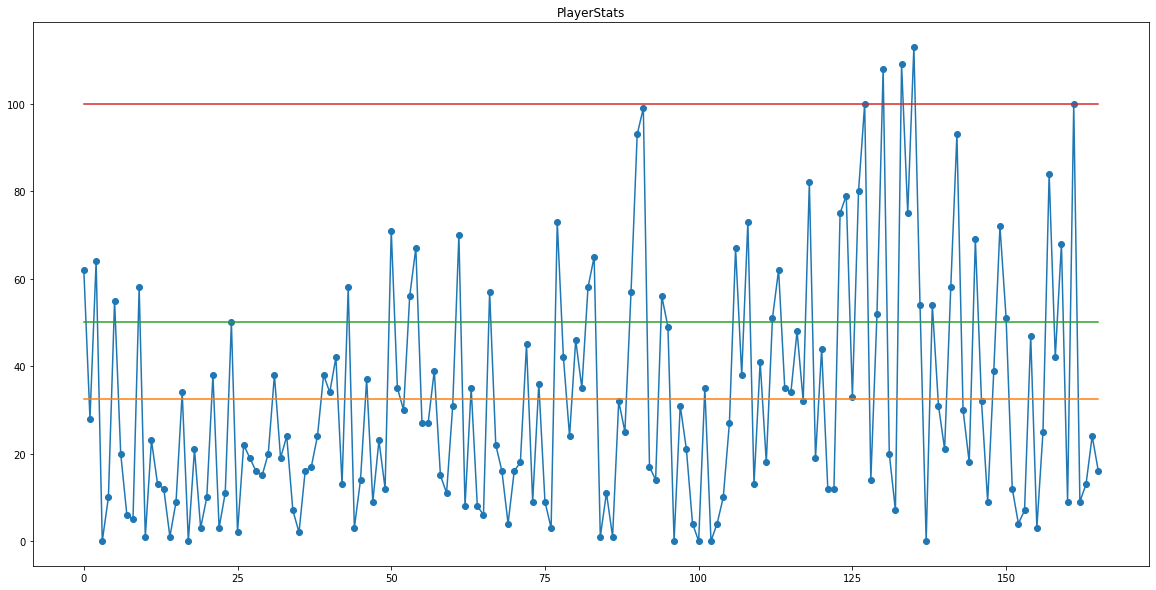

In [72]:
#Plot of the Runs Scored by the Player
total_runs = 0
for i in range(len(Runs)):
    total_runs += Runs[i]
total_runs

x = np.arange(len(Player_Match_Runs))
plt.figure(figsize=(20, 10))  
plt.scatter(x,Runs)
plt.plot(Runs)
plt.title('PlayerStats')
plt.plot(x,0*x+total_runs/len(Runs))
plt.plot(x,0*x+50)
plt.plot(x,0*x+100)
plt.show()

In [73]:
#Find the runs scored by the player
total_runs = 0
k = len(Runs)
for i in range(k):
    total_runs += Runs[i]
total_runs

5402

In [74]:
#Strike Rate of the Batsman
strike_rate = total_runs/len(Player_Balls)*100
print("Strike Rate of",name,"is",strike_rate)

Strike Rate of V Kohli is 131.78824103439862


In [75]:
#Average of the Batsman
dismisal_list = list(data_set.player_dismissed)
current_player_dismisal_count = 0
for item in dismisal_list:
    if(item == name):
        current_player_dismisal_count = current_player_dismisal_count+1
print("Average of",name,"is",total_runs/current_player_dismisal_count)

Average of V Kohli is 38.312056737588655


In [76]:
attribute_player = ["Name","Runs Scored","Strike rate","Average","Century","Fifty"]
value_player = [name,total_runs,strike_rate,total_runs/current_player_dismisal_count,century,fifty]
player_consolidated = {"Attributes":attribute_player,"Values":value_player}
player_consolidated_dataframe = pd.DataFrame(player_consolidated)
player_consolidated_dataframe

,Attributes,Values
0,Name,V Kohli
1,Runs Scored,5402
2,Strike rate,131.788
3,Average,38.3121
4,Century,5
5,Fifty,37


DATA PREDICTION USING ML MODELS


In [79]:
#encoding data
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Sunrisers Hyderabad','Chennai Super Kings',
                'Rajasthan Royals','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Rising Pune Supergiants' ,'Kochi Tuskers Kerala','Pune Warriors']
               ,['MI','KKR','RCB','SRH','CSK','RR','DC','GL','KXIP','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'SRH':4,'CSK':5,'RR':6,'DC':7,'GL':8,'KXIP':9,'RPS':10,'KTK':11,'PW':12},
          'team2': {'MI':1,'KKR':2,'RCB':3,'SRH':4,'CSK':5,'RR':6,'DC':7,'GL':8,'KXIP':9,'RPS':10,'KTK':11,'PW':12},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'SRH':4,'CSK':5,'RR':6,'DC':7,'GL':8,'KXIP':9,'RPS':10,'KTK':11,'PW':12},
          'winner': {'MI':1,'KKR':2,'RCB':3,'SRH':4,'CSK':5,'RR':6,'DC':7,'GL':8,'KXIP':9,'RPS':10,'KTK':11,'PW':12}}
matches.replace(encode, inplace=True)
matches.head(4)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,4,3,3,field,normal,0,4,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,1,10,10,field,normal,0,10,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,10,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium


In [80]:
data = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
data.head(2)
#df = pd.DataFrame(matches)


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,4,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",4
1,1,10,Pune,field,10,Maharashtra Cricket Association Stadium,10


In [81]:
df = pd.DataFrame(data)
df.dropna(inplace=True)

In [83]:
#encoding string values, making it easier for the machine to understand
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome].values.ravel())
  #print(data[predictors].shape)
  #print(data[outcome].shape)
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_splits=7,shuffle=False)
  error = []
  for train, test in kf.split(data):
    train_predictors = (data[predictors].iloc[train,:])
    #train_predictors.values.ravel()
    train_target = data[outcome].iloc[train]
    #train_target.values.ravel()
    model.fit(train_predictors, train_target.values.ravel())
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
  
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))
  model.fit(data[predictors],data[outcome].values.ravel()) 
  #return accuracy,np.mean(error)


In [85]:
print("Logistic Regression")
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = LogisticRegression(solver='liblinear', max_iter=1000)
classification_model(model, df,predictor_var,outcome_var)

Logistic Regression
Accuracy : 32.713%
Cross-Validation Score : 30.319%


In [86]:
print("Random Forest Classifier")
from sklearn.ensemble import RandomForestRegressor
#model = RandomForestClassifier(n_estimators=460,min_samples_leaf=2,min_samples_split=3,bootstrap =True,max_features= 'auto',max_depth=13)
model = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=25,
    min_samples_split=3,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced')
outcome_var = ['winner']
#print(outcome_var)
predictor_var = ['team1', 'team2', 'venue','toss_winner','toss_decision','city']
classification_model(model, df,predictor_var,outcome_var)

Random Forest Classifier
Accuracy : 86.170%
Cross-Validation Score : 49.601%


In [93]:
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = DecisionTreeClassifier()
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 86.835%
Cross-Validation Score : 51.064%


In [88]:
print("SVC SVM")
from sklearn import svm
model = svm.SVC()
outcome_var = ['winner']
#print(outcome_var)
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

SVC SVM
Accuracy : 43.085%
Cross-Validation Score : 40.293%


In [89]:
from sklearn.naive_bayes import GaussianNB
print("Naive Bayes")
model = GaussianNB()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Naive Bayes
Accuracy : 19.548%
Cross-Validation Score : 17.420%


In [90]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
acc=[]
cvs=[]
print("KNN Classifiers")
outcome_var = ['winner']
#print(outcome_var)
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','toss_decision']
knn = KNeighborsClassifier(n_neighbors=4,p=1)
classification_model(knn, df,predictor_var,outcome_var)

KNN Classifiers
Accuracy : 63.564%
Cross-Validation Score : 43.617%
